In [92]:
import pandas as pd

housing = pd.read_csv('data/housing.csv')

In [93]:
print(housing.shape)

(20640, 10)


In [94]:
#data types
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [95]:
#count nas
print(housing.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<Axes: ylabel='Frequency'>

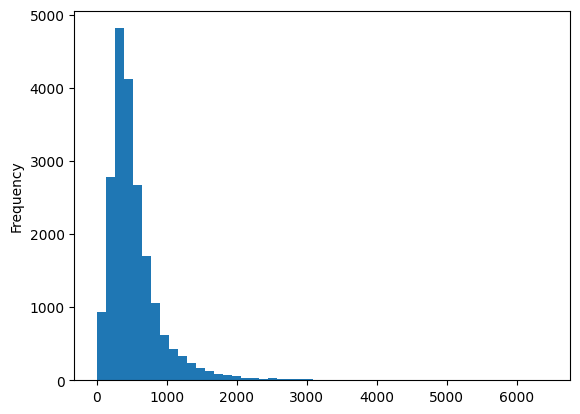

In [96]:
# plot total_bedrooms on 50 bins
housing['total_bedrooms'].plot(kind='hist', bins=50)

In [97]:
# calculate mean, std, min, max, 25%, 50%, 75% percentiles for total_bedrooms
print(housing['total_bedrooms'].describe())



count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [98]:
#summary statistics
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

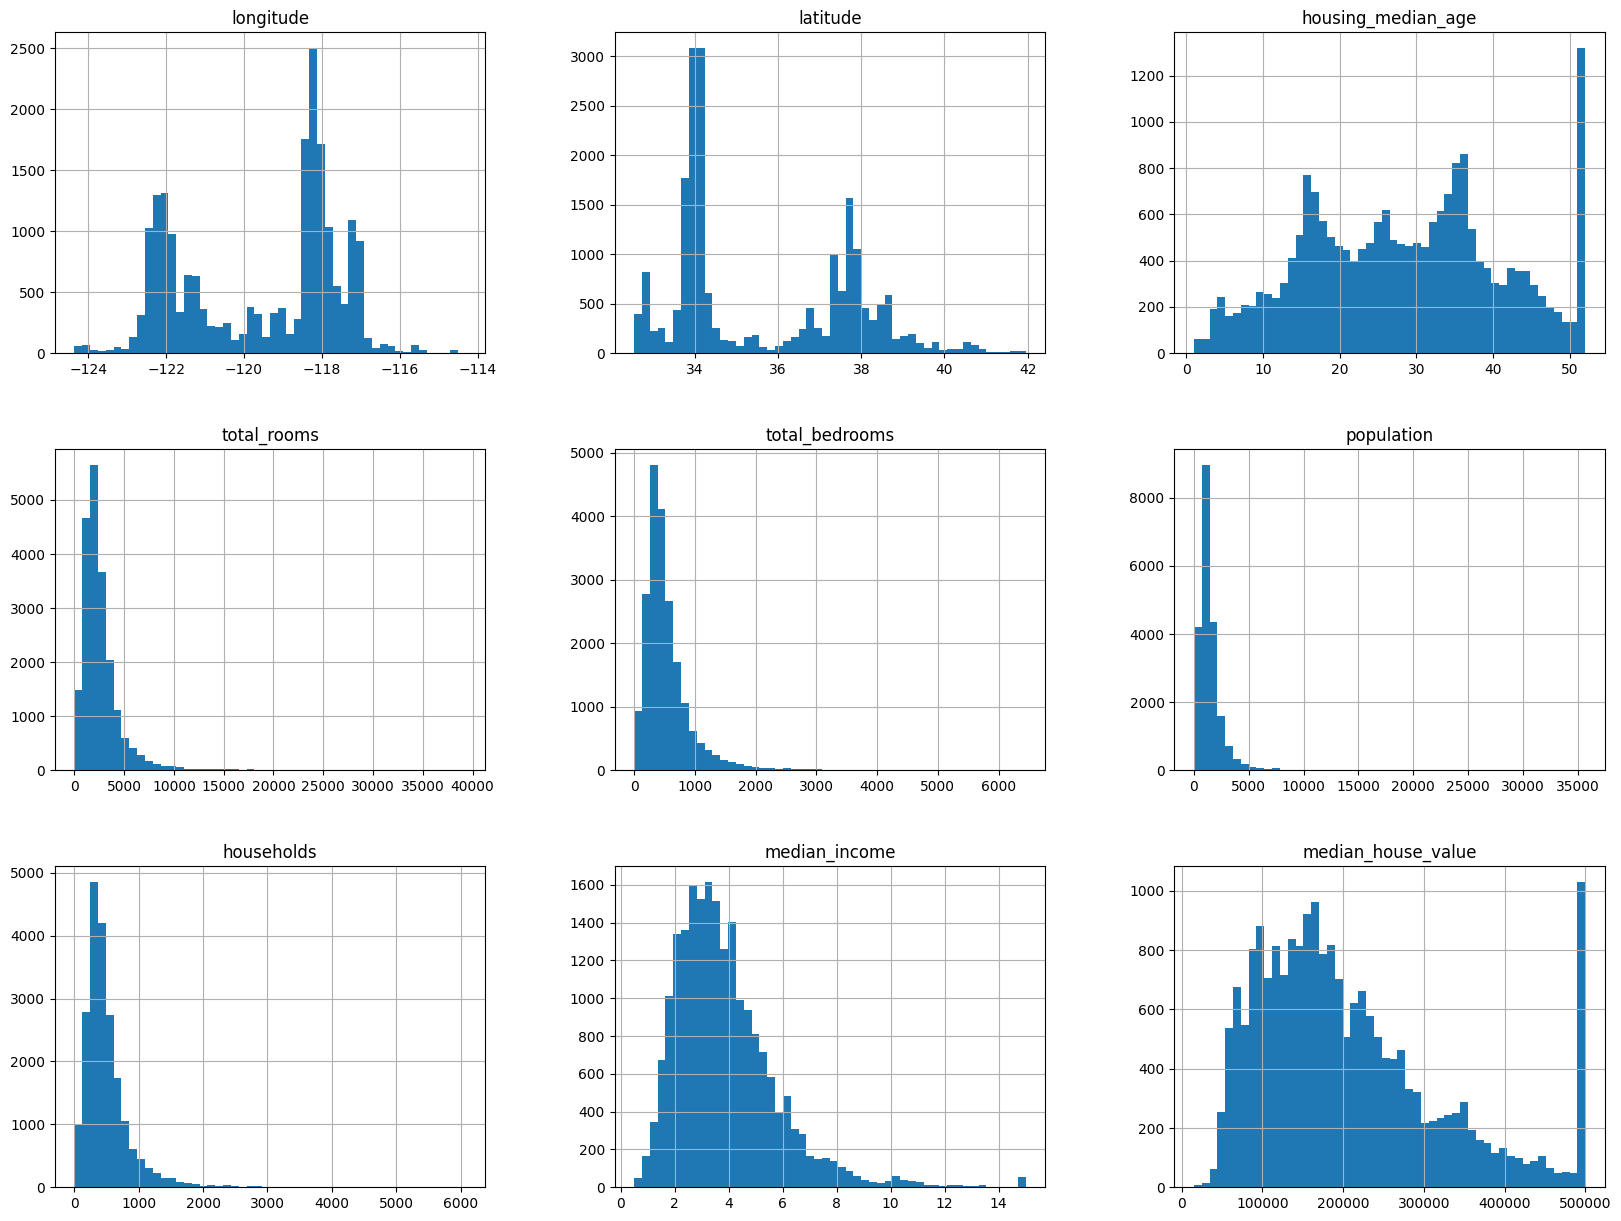

In [99]:
#histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

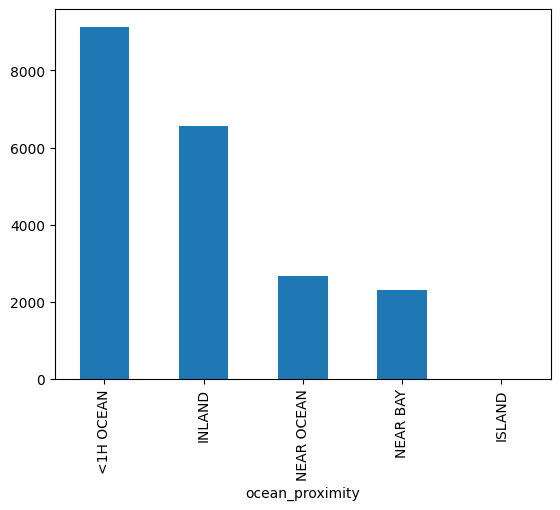

In [100]:
#Plot ocean_proximity
housing['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

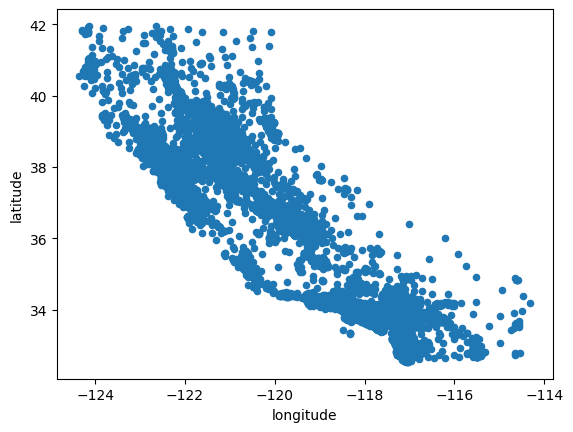

In [101]:
#scatter plot
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

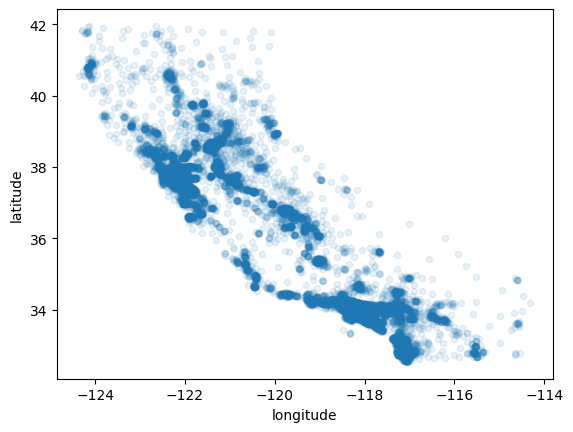

In [102]:
#cmap for color
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

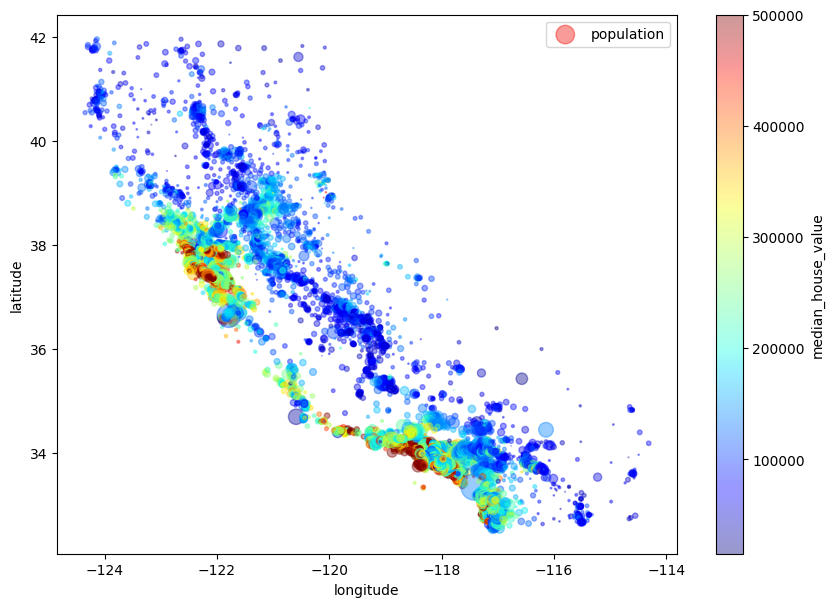

In [103]:
#bubble plot
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()


In [104]:
#create table of numerical attributes
num_attribs = housing.select_dtypes(include=[float, int])
print(num_attribs.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [105]:

#correlation matrix of numerical attributes
corr_matrix = num_attribs.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [106]:
#create one-hot encoding for ocean_proximity
housing_dummies = pd.get_dummies(housing, columns=['ocean_proximity'])
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [107]:
#correlation matrix of all attributes
corr_matrix = housing_dummies.corr()
print(corr_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_

In [108]:
#split data into training and test sets using stratified sampling based on all features with ocean_proximity
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['ocean_proximity']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_train_set['ocean_proximity'].value_counts())
print(strat_test_set['ocean_proximity'].value_counts())

print(strat_train_set.shape)
print(strat_test_set.shape)


    

ocean_proximity
<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: count, dtype: int64
ocean_proximity
<1H OCEAN     1827
INLAND        1310
NEAR OCEAN     532
NEAR BAY       458
ISLAND           1
Name: count, dtype: int64
(16512, 10)
(4128, 10)


In [109]:
#on the training set, get one-hot encoding for ocean_proximity
strat_train_set_dummies = pd.get_dummies(strat_train_set, columns=['ocean_proximity'])
print(strat_train_set_dummies.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [110]:
strat_test_set_dummies = pd.get_dummies(strat_test_set, columns=['ocean_proximity'])

In [111]:
#calculate all median values in strat_train_set_dummies
median_values = strat_train_set_dummies.median()
print(median_values)

longitude                       -118.5000
latitude                          34.2600
housing_median_age                29.0000
total_rooms                     2115.0000
total_bedrooms                   433.0000
population                      1161.0000
households                       409.0000
median_income                      3.5313
median_house_value            180400.0000
ocean_proximity_<1H OCEAN          0.0000
ocean_proximity_INLAND             0.0000
ocean_proximity_ISLAND             0.0000
ocean_proximity_NEAR BAY           0.0000
ocean_proximity_NEAR OCEAN         0.0000
dtype: float64


In [112]:
#fill nas in strat_train_set_dummies with median values of the corresponding columns
strat_train_set_dummies.fillna(median_values, inplace=True)
strat_test_set_dummies.fillna(median_values, inplace=True)

In [113]:
#check if there are any nas left
print(strat_train_set_dummies.isna().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [114]:
print(strat_test_set_dummies.isna().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [115]:
#calculate IQR for all attributes using describe
Q1 = strat_train_set_dummies.describe().loc['25%']
Q3 = strat_train_set_dummies.describe().loc['75%']
IQR = Q3 - Q1
print(IQR)

longitude                  3.79000
latitude                   3.79000
housing_median_age        19.00000
total_rooms             1685.00000
total_bedrooms           344.00000
population               934.25000
households               323.25000
median_income              2.18165
median_house_value    145900.00000
dtype: float64


In [116]:
#separate the target variable from the training set and the test set
X_train = strat_train_set_dummies.drop(columns='median_house_value')
y_train = strat_train_set_dummies['median_house_value']

X_test = strat_test_set_dummies.drop(columns='median_house_value')
y_test = strat_test_set_dummies['median_house_value']

In [117]:
from sklearn.preprocessing import RobustScaler
# Data Preprocessing
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, 
    LassoLars, PassiveAggressiveRegressor, TheilSenRegressor, 
    HuberRegressor, RANSACRegressor, ARDRegression
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
    mape = mean_absolute_percentage_error(y_test, y_pred)
    computation_time = end_time - start_time
    
    return mse, rmse, mae, r2, adj_r2, mape, computation_time

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('MLP', MLPRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Bayesian Ridge', BayesianRidge()),
    ('Lasso LARS', LassoLars()),
    ('Passive Aggressive', PassiveAggressiveRegressor()),
    ('Theil-Sen', TheilSenRegressor()),
    ('Huber', HuberRegressor()),
    ('RANSAC', RANSACRegressor()),
    ('ARD', ARDRegression()),
    ('Gaussian Process', GaussianProcessRegressor()),
    ('Linear SVR', LinearSVR())
]

results = []

for name, model in models:
    mse, rmse, mae, r2, adj_r2, mape, comp_time = train_predict_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Adjusted R2': adj_r2,
        'MAPE': mape,
        'Computation Time (s)': comp_time
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Set 'Model' as the index and round numeric columns to 4 decimal places
results_df = results_df.set_index('Model').round(4)

# Display the table
print(results_df.to_string())

# Optionally, save the results to a CSV file
results_df.to_csv('model_comparison_results.csv')

C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207046.193375
Learning rate set to 0.063766
0:	learn: 111117.0360159	total: 5.05ms	remaining: 5.04s
1:	learn: 107182.7967248	total: 9.52ms	remaining: 4.75s
2:	learn: 103635.8301741	total: 14.1ms	remaining: 4.69s
3:	learn: 100386.4688663	total: 18.7ms	remaining: 4.65s
4:	learn: 97268.5981522	total: 23.1ms	remaining: 4.59s
5:	learn: 94566.2882262	total: 27.7ms	remaining: 4.58s
6:	learn: 91880.4872998	total: 32.1ms	remaining: 4.55s
7:	learn: 89571.6556190	total: 37.3ms	remaining: 4.62s
8:	learn: 87484.2750797	total: 42.1ms	remaining: 4.63s
9:	learn: 85504.5892733	total: 46.9ms	remaining: 4.65s
10:	learn: 83693.5746152	total: 52.2ms	remaining: 4.69s
11:	learn: 82

C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+12, tolerance: 2.193e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                             MSE          RMSE           MAE        R2  Adjusted R2      MAPE  Computation Time (s)
Model                                                                                                              
Linear Regression   4.683526e+09  6.843629e+04  4.984630e+04    0.6516       0.6505   28.8134                0.0069
Decision Tree       4.750716e+09  6.892544e+04  4.304111e+04    0.6467       0.6455   23.7956                0.1884
Random Forest       2.358319e+09  4.856252e+04  3.129599e+04    0.8246       0.8240   17.6911               13.0192
SVR                 1.401473e+10  1.183838e+05  8.733718e+04   -0.0424      -0.0457   51.8539               13.4156
MLP                 2.626433e+10  1.620627e+05  1.266571e+05   -0.9535      -0.9597   56.2977               13.0284
Gradient Boosting   3.009299e+09  5.485708e+04  3.835384e+04    0.7762       0.7755   21.9276                3.1487
XGBoost             2.305212e+09  4.801262e+04  3.131603e+04    0.8285  

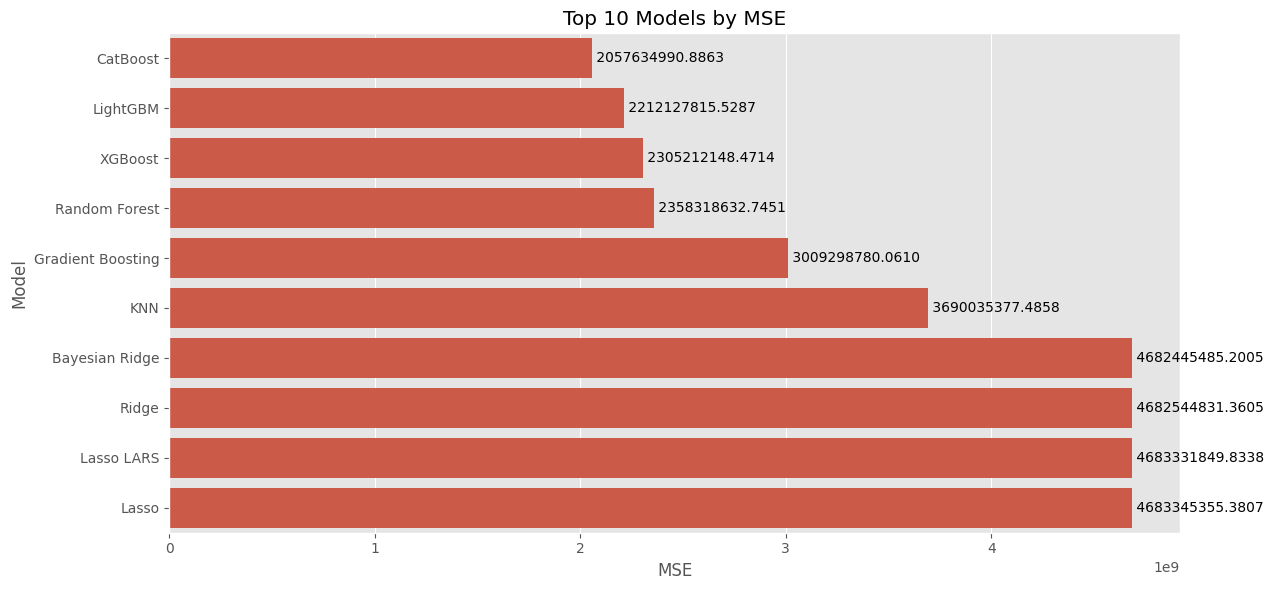

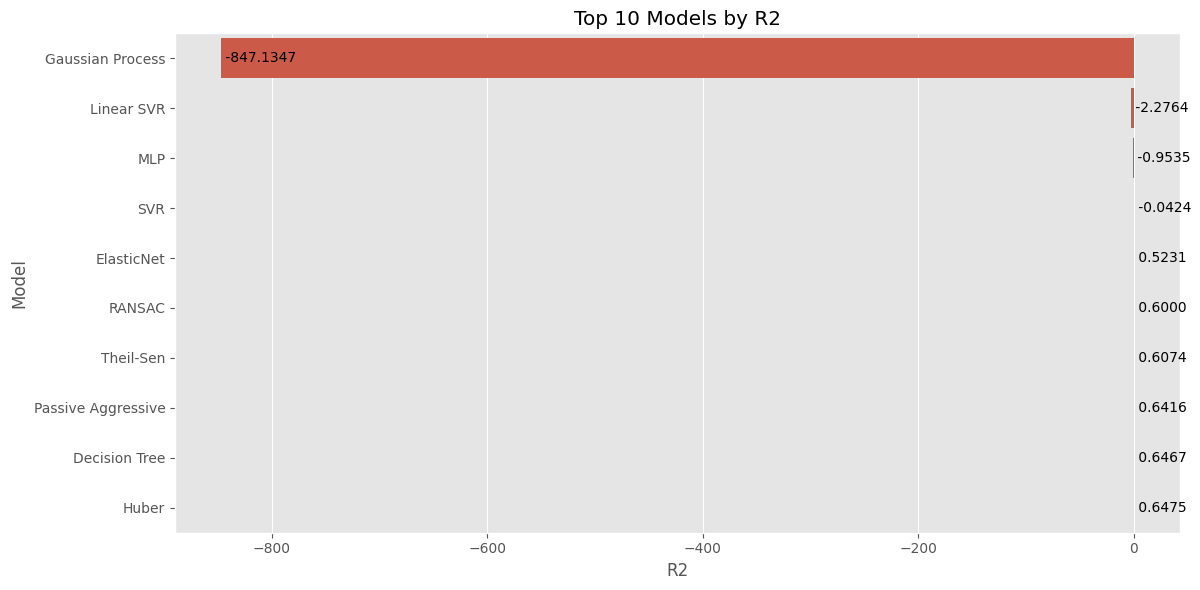

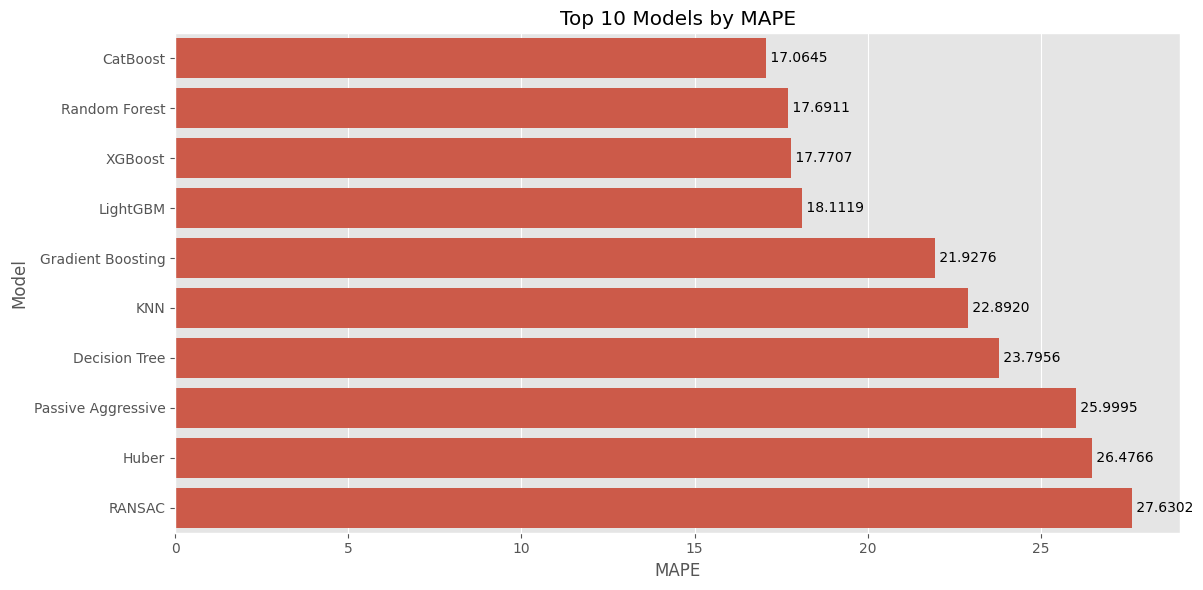

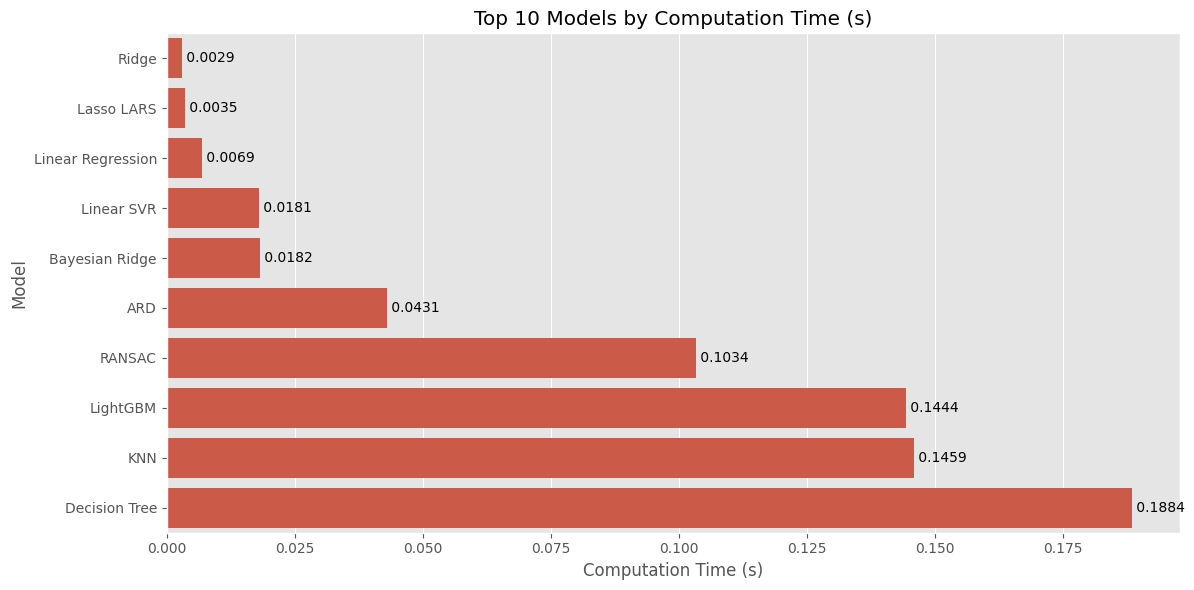

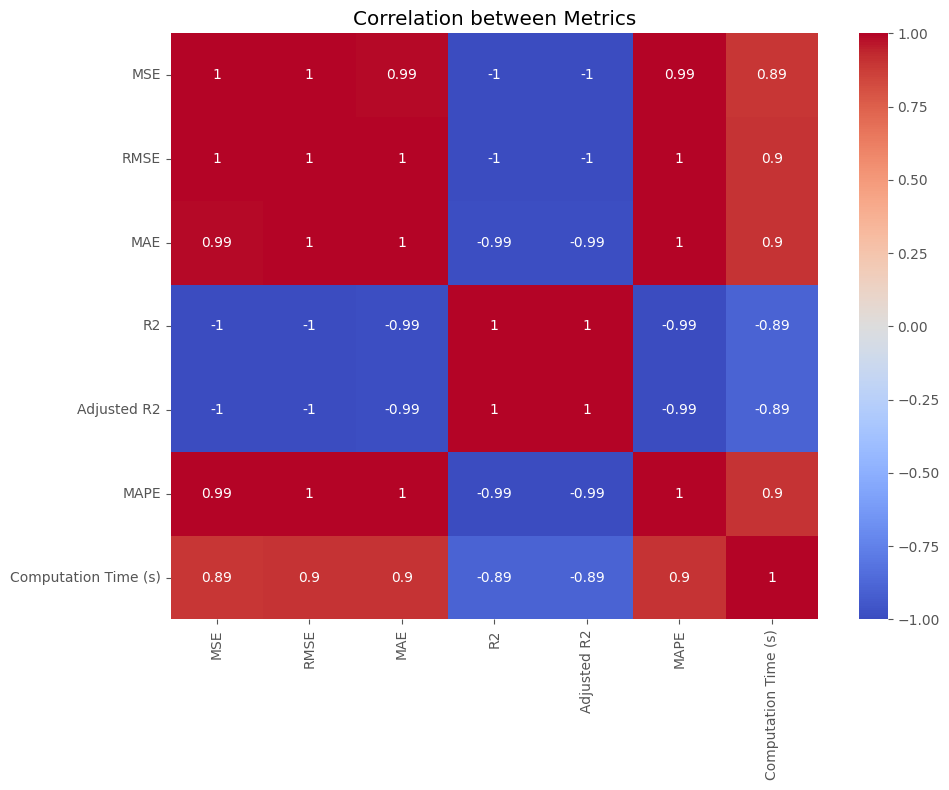

C:\Users\i_bau\AppData\Local\Temp\ipykernel_33484\3120293184.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(model, (results_df['Computation Time (s)'][i], results_df['R2'][i]))


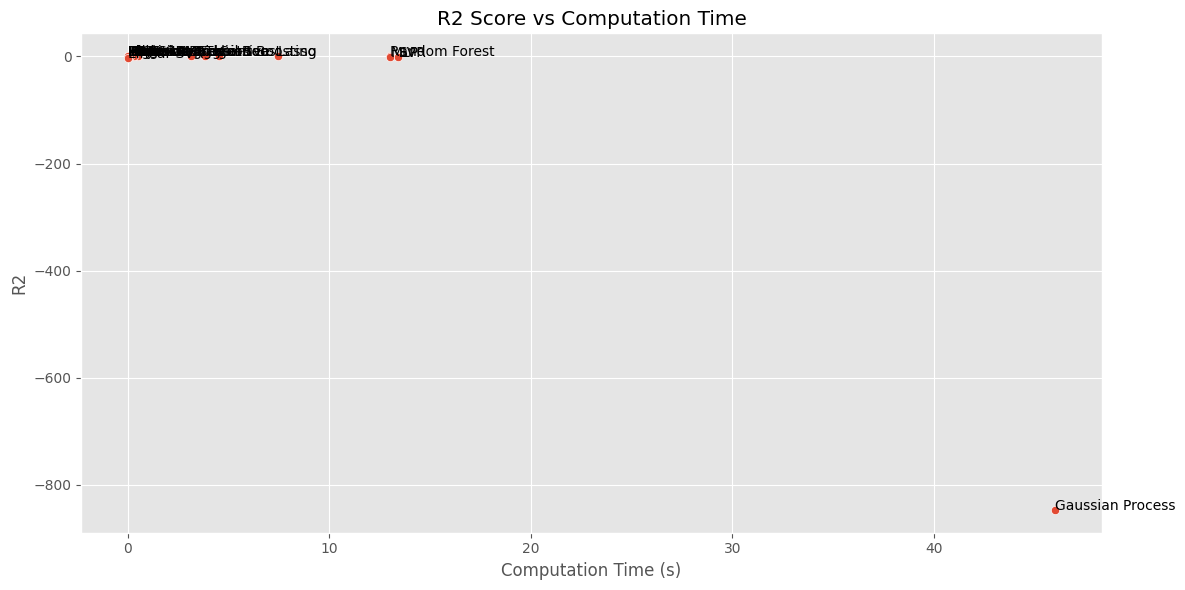


Top 3 models by MSE:
                   MSE
Model                 
CatBoost  2.057635e+09
LightGBM  2.212128e+09
XGBoost   2.305212e+09

Top 3 models by RMSE:
                RMSE
Model               
CatBoost  45361.1617
LightGBM  47033.2629
XGBoost   48012.6249

Top 3 models by MAE:
                      MAE
Model                    
CatBoost       29960.5460
Random Forest  31295.9904
XGBoost        31316.0273

Top 3 models by R2:
              R2
Model           
CatBoost  0.8470
LightGBM  0.8355
XGBoost   0.8285

Top 3 models by Adjusted R2:
          Adjusted R2
Model                
CatBoost       0.8465
LightGBM       0.8349
XGBoost        0.8280

Top 3 models by MAPE:
                  MAPE
Model                 
CatBoost       17.0645
Random Forest  17.6911
XGBoost        17.7707

Top 3 models by Computation Time (s):
                   Computation Time (s)
Model                                  
Ridge                            0.0029
Lasso LARS                       0.0035


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is already created from the previous code

# Set style for better-looking plots
plt.style.use('ggplot')

def plot_metric_comparison(df, metric, top_n=10):
    plt.figure(figsize=(12, 6))
    df_sorted = df.sort_values(metric, ascending=True)
    ax = sns.barplot(x=df_sorted[metric][:top_n], y=df_sorted.index[:top_n])
    plt.title(f'Top {top_n} Models by {metric}')
    plt.xlabel(metric)
    plt.tight_layout()
    
    # Add value labels to the bars
    for i, v in enumerate(df_sorted[metric][:top_n]):
        ax.text(v, i, f' {v:.4f}', va='center')
    
    plt.show()

# Plot comparisons for different metrics
plot_metric_comparison(results_df, 'MSE')
plot_metric_comparison(results_df, 'R2')
plot_metric_comparison(results_df, 'MAPE')
plot_metric_comparison(results_df, 'Computation Time (s)')

# Correlation heatmap of metrics
plt.figure(figsize=(10, 8))
sns.heatmap(results_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Metrics')
plt.tight_layout()
plt.show()

# Scatter plot of R2 vs Computation Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Computation Time (s)', y='R2', data=results_df)
for i, model in enumerate(results_df.index):
    plt.annotate(model, (results_df['Computation Time (s)'][i], results_df['R2'][i]))
plt.title('R2 Score vs Computation Time')
plt.tight_layout()
plt.show()

# Print top 3 models for each metric
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'Adjusted R2', 'MAPE', 'Computation Time (s)']
for metric in metrics:
    ascending = True if metric not in ['R2', 'Adjusted R2'] else False
    top_3 = results_df.sort_values(metric, ascending=ascending).head(3)
    print(f"\nTop 3 models by {metric}:")
    print(top_3[[metric]])

# Overall ranking
results_df['MSE_rank'] = results_df['MSE'].rank()
results_df['RMSE_rank'] = results_df['RMSE'].rank()
results_df['MAE_rank'] = results_df['MAE'].rank()
results_df['R2_rank'] = results_df['R2'].rank(ascending=False)
results_df['Adjusted R2_rank'] = results_df['Adjusted R2'].rank(ascending=False)
results_df['MAPE_rank'] = results_df['MAPE'].rank()
results_df['Computation Time (s)_rank'] = results_df['Computation Time (s)'].rank()

results_df['Overall_rank'] = results_df[[col for col in results_df.columns if col.endswith('_rank')]].mean(axis=1)
top_5_overall = results_df.sort_values('Overall_rank').head()

print("\nTop 5 models overall:")
print(top_5_overall[['MSE', 'R2', 'MAPE', 'Computation Time (s)', 'Overall_rank']])

# Save full results to CSV
results_df.to_csv('model_comparison_results.csv')

In [119]:
assert False, "Stop here"

AssertionError: Stop here

In [ ]:
# Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, 
    LassoLars, PassiveAggressiveRegressor, TheilSenRegressor, 
    HuberRegressor, RANSACRegressor, ARDRegression
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# Function to train, predict and evaluate a model
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('MLP', MLPRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Bayesian Ridge', BayesianRidge()),
    ('Lasso LARS', LassoLars()),
    ('Passive Aggressive', PassiveAggressiveRegressor()),
    ('Theil-Sen', TheilSenRegressor()),
    ('Huber', HuberRegressor()),
    ('RANSAC', RANSACRegressor()),
    ('ARD', ARDRegression()),
    ('Gaussian Process', GaussianProcessRegressor()),
    ('Linear SVR', LinearSVR())
]

In [ ]:
# Evaluate all models
for name, model in models:
    mse, rmse, mae, r2 = train_predict_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2: {r2:.4f}")
    print()

Linear Regression:
  MSE: 4683525502.3890
  RMSE: 68436.2879
  MAE: 49846.2992
  R2: 0.6516

Decision Tree:
  MSE: 4565055596.5056
  RMSE: 67565.1952
  MAE: 42424.8244
  R2: 0.6605

Random Forest:
  MSE: 2333176615.6368
  RMSE: 48302.9669
  MAE: 31119.4832
  R2: 0.8265

SVR:
  MSE: 14014730048.2174
  RMSE: 118383.8251
  MAE: 87337.1786
  R2: -0.0424



C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP:
  MSE: 27192137798.8802
  RMSE: 164900.3875
  MAE: 129672.9309
  R2: -1.0225

Gradient Boosting:
  MSE: 3009298780.0610
  RMSE: 54857.0759
  MAE: 38353.8358
  R2: 0.7762

XGBoost:
  MSE: 2305212148.4714
  RMSE: 48012.6249
  MAE: 31316.0273
  R2: 0.8285

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207046.193375
LightGBM:
  MSE: 2212127815.5287
  RMSE: 47033.2629
  MAE: 31638.6897
  R2: 0.8355

Learning rate set to 0.063766
0:	learn: 111117.0360159	total: 4.73ms	remaining: 4.72s
1:	learn: 107182.7967248	total: 9.27ms	remaining: 4.63s
2:	learn: 103635.8301741	total: 13.4ms	remaining: 4.46s
3:	learn: 100386.4688663	total: 17.5ms	remaining: 4.37s
4:	learn: 97268.5981522	total: 21.4ms	remaining: 4.26s
5

C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+12, tolerance: 2.193e+10
  model = cd_fast.enet_coordinate_descent(


Lasso:
  MSE: 4683345355.3807
  RMSE: 68434.9717
  MAE: 49845.0696
  R2: 0.6517

ElasticNet:
  MSE: 6411225724.0615
  RMSE: 80070.1300
  MAE: 61148.7217
  R2: 0.5231

Bayesian Ridge:
  MSE: 4682445485.2005
  RMSE: 68428.3968
  MAE: 49835.7351
  R2: 0.6517

Lasso LARS:
  MSE: 4683331849.8338
  RMSE: 68434.8731
  MAE: 49844.9853
  R2: 0.6517

Passive Aggressive:
  MSE: 4821992051.5845
  RMSE: 69440.5649
  MAE: 48239.7346
  R2: 0.6414

Theil-Sen:
  MSE: 5332269500.8745
  RMSE: 73022.3904
  MAE: 51269.8633
  R2: 0.6034



C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber:
  MSE: 4738793395.3050
  RMSE: 68838.8945
  MAE: 48288.3282
  R2: 0.6475

RANSAC:
  MSE: 5565691243.3859
  RMSE: 74603.5605
  MAE: 51085.5717
  R2: 0.5860

ARD:
  MSE: 4684394197.4325
  RMSE: 68442.6344
  MAE: 49872.1324
  R2: 0.6516

Gaussian Process:
  MSE: 11403055272826.8828
  RMSE: 3376841.0198
  MAE: 1109715.6625
  R2: -847.1347

Linear SVR:
  MSE: 44050901157.8845
  RMSE: 209883.0654
  MAE: 175585.6582
  R2: -2.2764



In [ ]:
assert False, "Stop here"

AssertionError: Stop here

In [ ]:
#scale the training set and the test set using median and IQR
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train a linear regression model on the training set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = lin_reg.predict(X_test_scaled)

#calculate the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

#calculate the root mean squared error
rmse = mse ** 0.5
print(rmse)

#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

#calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

#train a decision tree regressor on the training set
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = tree_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse ** 0.5

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a random forest regressor on the training set
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = forest_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse ** 0.5

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a support vector machine regressor on the training set
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = svr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a neural network regressor on the training set
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = mlp.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a gradient boosting regressor on the training set
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = gbr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a xgboost regressor on the training set
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = xgb.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a lightgbm regressor on the training set
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = lgbm.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a catboost regressor on the training set
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = cat.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a k-nearest neighbors regressor on the training set
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = knn.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a ridge regressor on the training set
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = ridge.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a lasso regressor on the training set
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = lasso.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a elastic net regressor on the training set
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = elastic.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a bayesian ridge regressor on the training set
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = bayesian.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a lars lasso regressor on the training set
from sklearn.linear_model import LassoLars

lassolars = LassoLars()
lassolars.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = lassolars.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)


#train a passive aggressive regressor on the training set
from sklearn.linear_model import PassiveAggressiveRegressor

passive = PassiveAggressiveRegressor()
passive.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = passive.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a theil sen regressor on the training set
from sklearn.linear_model import TheilSenRegressor

theil = TheilSenRegressor()
theil.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = theil.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a huber regressor on the training set
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = huber.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a ransac regressor on the training set
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = ransac.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a ard regressor on the training set
from sklearn.linear_model import ARDRegression

ard = ARDRegression()
ard.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = ard.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a gaussian process regressor on the training set
from sklearn.gaussian_process import GaussianProcessRegressor

gaussian = GaussianProcessRegressor()
gaussian.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = gaussian.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)

#train a linear support vector machine regressor on the training set
from sklearn.svm import LinearSVR

lsvr = LinearSVR()
lsvr.fit(X_train_scaled, y_train)

#predict the target variable on the test set
y_pred = lsvr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculate the root mean squared error
rmse = mse

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(r2)


4683525502.38901
68436.28790626366
49846.29918121596
0.6516494378215324
0.6499891262755537
0.8246838248963729
-0.042385503951186454


C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.9470764420068807
0.7761748235890857
0.828543274195679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207046.193375
0.8354666868458414
Learning rate set to 0.063766
0:	learn: 111117.0360159	total: 150ms	remaining: 2m 29s
1:	learn: 107182.7967248	total: 153ms	remaining: 1m 16s
2:	learn: 103635.8301741	total: 156ms	remaining: 51.8s
3:	learn: 100386.4688663	total: 160ms	remaining: 39.7s
4:	learn: 97268.5981522	total: 163ms	remaining: 32.5s
5:	learn: 94566.2882262	total: 167ms	remaining: 27.7s
6:	learn: 91880.4872998	total: 171ms	remaining: 24.2s
7:	learn: 89571.6556190	total: 175ms	remaining: 21.7s
8:	learn: 87484.2750797	total: 179ms	remaining: 19.7s
9:	learn: 85504.5892733	total: 183ms	remaining: 18.1s
1

C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+12, tolerance: 2.193e+10
  model = cd_fast.enet_coordinate_descent(


0.6516628367688849
0.5231468080849228
0.6517297671791031
0.6516638412824387
0.6403382831125677
0.5983632659033435


C:\Users\i_bau\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6475387307146978
0.5573915966322953
0.6515848261509838
-847.1347465312575
-2.2766274538096334
